In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\praka\Downloads\1_india_disability.csv")
# df = df.drop(['Total disabled population - Persons','Main worker - Persons','Non-worker - Persons'],axis=1)
df.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


In [2]:
df.reset_index(drop=True, inplace=True)

In [3]:
# Data cleaning on Area Name

for i in range(0,len(df)):
    if(df['Area Name'][i] != 'INDIA'):
        df['Area Name'][i] = df['Area Name'][i][8:-5]
df['Area Name'].value_counts()

C:\Users\praka\AppData\Local\Temp\ipykernel_4608\904266011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area Name'][i] = df['Area Name'][i][8:-5]


INDIA                        135
JAMMU & KASHMIR              135
JHARKHAND                    135
ODISHA                       135
CHHATTISGARH                 135
MADHYA PRADESH               135
GUJARAT                      135
DAMAN & DIU                  135
DADRA & NAGAR HAVELI         135
MAHARASHTRA                  135
ANDHRA PRADESH               135
KARNATAKA                    135
GOA                          135
LAKSHADWEEP                  135
KERALA                       135
TAMIL NADU                   135
PUDUCHERRY                   135
WEST BENGAL                  135
ASSAM                        135
MEGHALAYA                    135
RAJASTHAN                    135
HIMACHAL PRADESH             135
PUNJAB                       135
CHANDIGARH                   135
UTTARAKHAND                  135
HARYANA                      135
NCT OF DELHI                 135
UTTAR PRADESH                135
TRIPURA                      135
BIHAR                        135
SIKKIM    

In [4]:
df.tail(15)

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
4845,35,ANDAMAN & NICOBAR ISLANDS,Urban,Mental-Illness,Total,100,56,44,6,6,0,93,49,44
4846,35,ANDAMAN & NICOBAR ISLANDS,Urban,Mental-Illness,0-14,8,5,3,0,0,0,8,5,3
4847,35,ANDAMAN & NICOBAR ISLANDS,Urban,Mental-Illness,15-59,85,47,38,6,6,0,79,41,38
4848,35,ANDAMAN & NICOBAR ISLANDS,Urban,Mental-Illness,60+,7,4,3,0,0,0,6,3,3
4849,35,ANDAMAN & NICOBAR ISLANDS,Urban,Mental-Illness,Age not stated,0,0,0,0,0,0,0,0,0
4850,35,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,Total,293,166,127,90,75,15,191,83,108
4851,35,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,0-14,71,35,36,0,0,0,70,34,36
4852,35,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,15-59,199,114,85,85,70,15,103,37,66
4853,35,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,60+,23,17,6,5,5,0,18,12,6
4854,35,ANDAMAN & NICOBAR ISLANDS,Urban,Any-Other,Age not stated,0,0,0,0,0,0,0,0,0


In [5]:
disability_count = df['Disability'].value_counts()
disability_count

Total                  540
In-Seeing              540
In-Hearing             540
In-Speech              540
In-Movement            540
Mental-Retardation     540
Mental-Illness         540
Any-Other              540
Multiple-Disability    540
Name: Disability, dtype: int64

In [6]:
df.rename(columns = {'State Code' : 'Code'}, inplace=True)
df.rename(columns = {'Area Name':'State'}, inplace = True)
df.rename(columns = {'Total/ Rural/Urban':'Area'}, inplace = True)
df.rename(columns = {'Total disabled population - Females':'Total_pop_Female'}, inplace = True)
df.rename(columns = {'Total disabled population - Males':'Total_pop_Male'}, inplace = True)
df.rename(columns = {'Total disabled population - Persons':'Total_pop'}, inplace = True)
df.rename(columns = {'Main worker - Females':'Worker_Female'}, inplace = True)
df.rename(columns = {'Main worker - Males':'Worker_Male'}, inplace = True)
df.rename(columns = {'Main worker - Persons':'Worker_Total'}, inplace = True)
df.rename(columns = {'Non-worker - Males':'Nonworker_Male'}, inplace = True)
df.rename(columns = {'Non-worker - Females':'Nonworker_Female'}, inplace = True)
df.rename(columns = {'Non-worker - Persons':'Nonworker_Total'}, inplace = True)

In [7]:
print(len(df))

4860


In [8]:
df.columns

Index(['Code', 'State', 'Area', 'Disability', 'Age-group', 'Total_pop',
       'Total_pop_Male', 'Total_pop_Female', 'Worker_Total', 'Worker_Male',
       'Worker_Female', 'Nonworker_Total', 'Nonworker_Male',
       'Nonworker_Female'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe())

              Code     Total_pop  Total_pop_Male  Total_pop_Female  \
count  4860.000000  4.860000e+03    4.860000e+03      4.860000e+03   
mean     17.500000  8.827982e+04    4.934516e+04      3.893465e+04   
std      10.389364  6.392453e+05    3.599061e+05      2.799268e+05   
min       0.000000  0.000000e+00    0.000000e+00      0.000000e+00   
25%       8.750000  1.847500e+02    1.030000e+02      8.000000e+01   
50%      17.500000  2.619500e+03    1.418000e+03      1.179000e+03   
75%      26.250000  2.801250e+04    1.540275e+04      1.256325e+04   
max      35.000000  2.681499e+07    1.498859e+07      1.182640e+07   

       Worker_Total   Worker_Male  Worker_Female  Nonworker_Total  \
count  4.860000e+03  4.860000e+03   4.860000e+03     4.860000e+03   
mean   2.298604e+04  1.799130e+04   4.994739e+03     5.619953e+04   
std    1.836440e+05  1.434532e+05   4.050627e+04     3.943821e+05   
min    0.000000e+00  0.000000e+00   0.000000e+00     0.000000e+00   
25%    1.500000e+01  1.1

In [10]:
from ipywidgets import interact, widgets
from IPython.display import display

In [11]:
# Dropdown widget for selecting 'Area Name' (multiple selection)
# area_dropdown = widgets.SelectMultiple(
#     options=['All'] + df['Area'].unique().tolist(),
#     value=['All'],
#     description='Area:'
# )

# Dropdown widget for selecting 'Disability' (multiple selection)
disability_dropdown = widgets.SelectMultiple(
    options=['All'] + df['Disability'].unique().tolist(),
    value=['All'],
    description='Disability:'
)

# Function to update the plot based on dropdown selections
def update_plot(disabilities):
    filtered_df = df.copy()
    
    # Apply filters based on dropdown values
    if 'All' not in disabilities:
        filtered_df = filtered_df[filtered_df['Disability'].isin(disabilities)]

    # Plotting
    plt.figure(figsize=(18, 5))

    # Plotting for Total_pop_Male
    plt.subplot(1, 3, 1)
    sns.barplot(x='Area', y='Total_pop_Male', hue='Disability', data=filtered_df)
    plt.title(f'Total Disabled Population - Males')

    # Plotting for Total_pop_Female
    plt.subplot(1, 3, 2)
    sns.barplot(x='Area', y='Total_pop_Female', hue='Disability', data=filtered_df)
    plt.title(f'Total Disabled Population - Females')

    # Plotting for Total_pop
    plt.subplot(1, 3, 3)
    sns.barplot(x='Area', y='Total_pop', hue='Disability', data=filtered_df)
    plt.title(f'Total Disabled Population')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Display the charts
    plt.show()

# Use the interact function to make the plot dynamic
interact(update_plot,disabilities=disability_dropdown)

interactive(children=(SelectMultiple(description='Disability:', index=(0,), options=('All', 'Total', 'In-Seein…

<function __main__.update_plot(disabilities)>

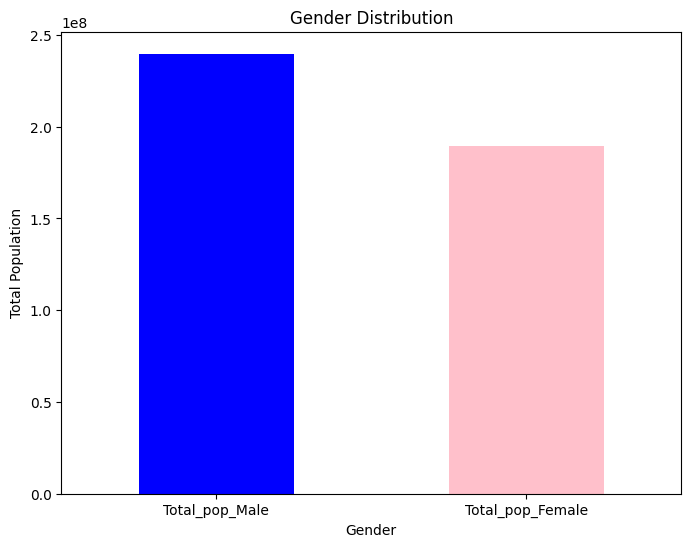

In [12]:
# Using matplotlib bar chart
gender_population = df[['Total_pop_Male', 'Total_pop_Female']].sum()

plt.figure(figsize=(8, 6))
gender_population.plot(kind='bar', color=['blue', 'pink'], rot=0)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Population')
plt.show()


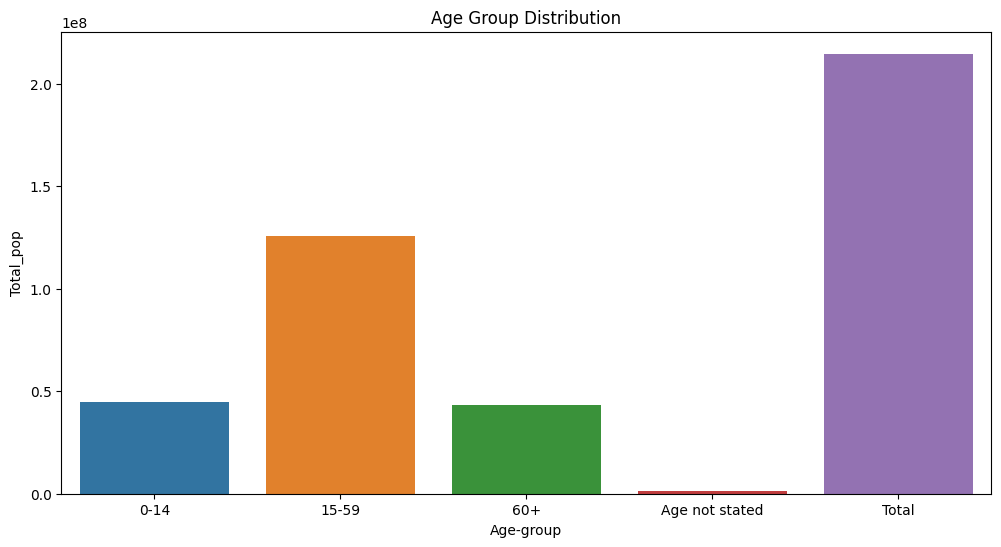

In [13]:
# Group by Age groups and calculate the total population
age_group_population = df.groupby('Age-group')['Total_pop'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Age-group', y='Total_pop', data=age_group_population)
plt.title('Age Group Distribution')
plt.show()


AttributeError: Line2D.set() got an unexpected keyword argument 'edgecolor'

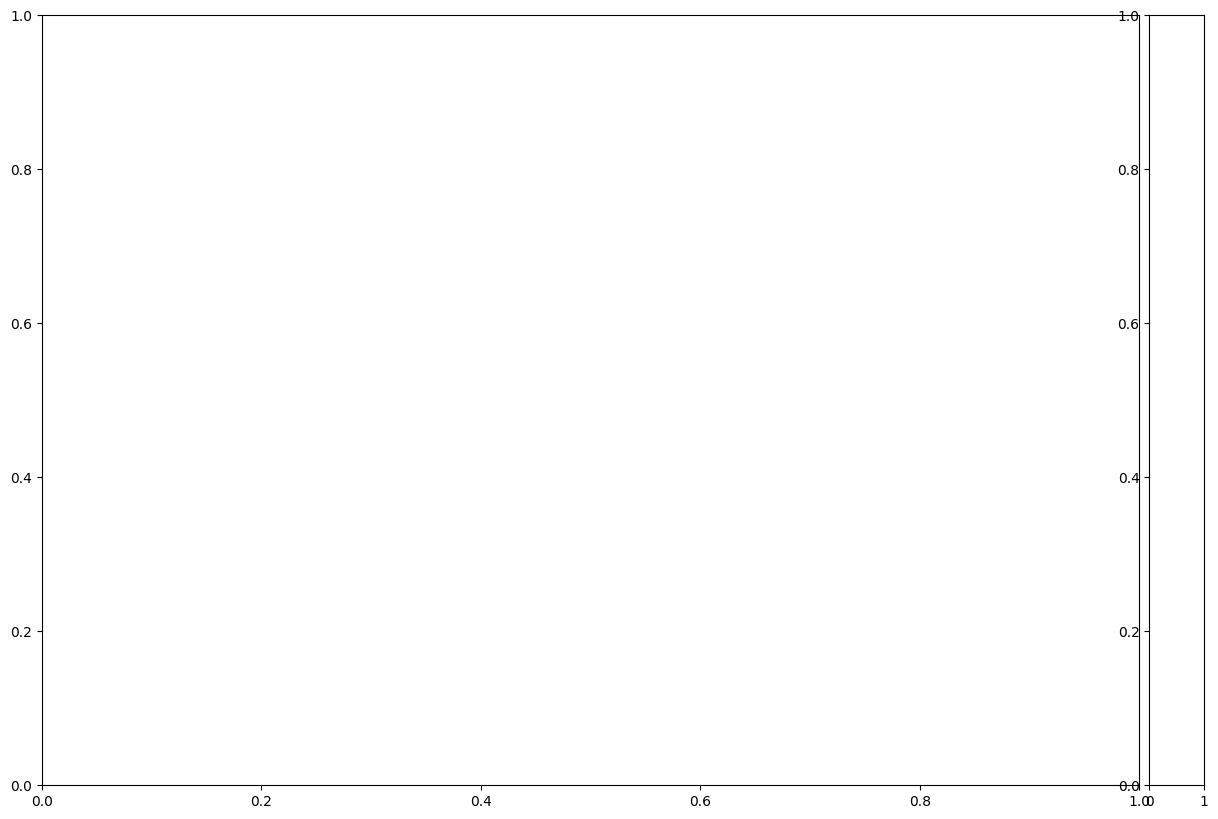

In [19]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
gdf = df.copy()
# Assuming you have a GeoDataFrame 'gdf' with geometries for each state
# Merge the GeoDataFrame with the demographic data
merged_df = gdf.merge(df.groupby('State')['Total_pop'].sum().reset_index())

# Plotting the choropleth map
fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_df.plot(column='Total disabled population - Persons', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
ax.set_title('Total Disabled Population by State')
plt.show()

In [17]:
gdf.columns

Index(['Code', 'State', 'Area', 'Disability', 'Age-group', 'Total_pop',
       'Total_pop_Male', 'Total_pop_Female', 'Worker_Total', 'Worker_Male',
       'Worker_Female', 'Nonworker_Total', 'Nonworker_Male',
       'Nonworker_Female'],
      dtype='object')